<a href="https://colab.research.google.com/github/nicolas-stelatto/bootcamp_data_science_aplicada/blob/main/Modulo_2/Notebooks/Bootcamp_Data_Science_Aplicada_Modulo_01_Aula_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 01 - Python e pandas para análise de dados reais

## Aula 02.Primeiras visualizações de gráficos

AS informações de onde conseguimos a base de dados para o trabalho estão no arquivo txt dentro do GitHub e do Notion [nesse link](https://www.notion.so/02-Primeiras-visualiza-es-de-dados-01-Entendendo-gr-ficos-612fd521bb814ec3a32be6ac102152dc)


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv")

Se tentarmos abrir o arquivo assim, aparecerá um erro utf-8, que é muito comum quando vamos abrir arquivos do governo. Esse erro está associado à forma de abrir um arquivo.

Uma analogia é que o á é lido em português de uma forma, mas em outras línguas é lido de outra forma. Para isso, nós precisamos definir uma regra para o Python ler o arquivo. Para isso, precisamos definir um parâmetro dentro da nossa função que é encoding = "ISO-8859-1"

In [ ]:
#dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Dados/A184611189_28_143_208.csv", encoding="ISO-8859-1")

Agora se formos rodar esse arquivo, ele resultará o erro "Error Tokenising Data". Nesse caso, precisamos informar que é necessário pular as três primeiras linhas (porque não são relevantes) e também informar que o separador é o ";" e não p ","

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Módulo 1/Dados/Valor total por Ano_mês atendimento segundo Unidade da Federação.csv", encoding="ISO-8859-1", skiprows=3, sep=";", engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8457455,71","7766983,20","8858845,57","8407076,44","9492938,92","8206195,92","9011612,58","9124967,84","8406732,72","8411360,02","8651081,66","8193425,99","8388269,45","8645315,78","9050329,13","9211262,51","9490545,02","8600886,20","8919190,86","8909111,89","8409386,09","8924348,41","8948605,66","8660753,05","8327665,97","8431334,62","7251287,20","7490440,60","8957706,45","10993332,84","10479989,36","11433467,56","8876900,39","8167253,19","8759013,71","9003402,23","8414690,60","6039419,59","4732441,04","996411254,68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2968168,75","2769797,39","3057631,96","2874965,31","3175575,17","3060903,21","3253011,61","3040645,05","2926179,27","3126120,64","2473454,85","2277493,49","2594347,32","2234388,36","2473008,49","2979764,77","3070533,95","3249052,69","3567538,64","2981072,98","2998860,31","3293378,97","3174249,43","2959569,09","3276790,55","2985763,71","2939675,20","2672857,33","2940827,86","3914823,86","4053085,41","3658265,59","3470409,45","3267918,69","3393958,27","3711660,71","3005561,16","2272733,90","1137341,65","450048530,47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14549450,86","12753555,36","14749409,47","14577930,81","15381061,96","14653650,77","15544595,79","16374961,41","15343340,93","16249963,61","14255408,82","14274053,94","15358914,00","14100074,56","16103971,89","16154491,82","16529976,06","15509984,83","16642220,71","16493719,52","15351607,47","16339427,95","14821977,50","14965815,90","15982353,42","15166470,82","14815958,58","16379386,07","19625325,21","18433057,47","19303743,16","18687233,58","18628627,49","18728251,20","20451573,77","21546059,48","24439059,57","13679358,06","6799060,80","1917247936,05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2740952,07","2478349,44","2674958,94","2721261,19","2844811,66","2967161,35","2841587,97","3328230,63","2878691,04","2964324,32","2524712,40","2462451,64","2662240,18","2499996,16","2846135,56","2789823,29","2839389,53","2647540,20","2865777,71","3181321,82","3070436,96","3162342,44","3121104,71","2889969,87","3084561,08","2967159,04","2813954,05","2306119,95","2921522,16","3300012,98","3192075,41","3262354,34","2978629,22","3313296,78","3527263,23","3125021,90","3209323,68","3044798,77","2381844,31","328876965,09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33615836,09","30623491,62","34121931,00","35039954,20","35424611,06","34160283,18","34484949,49","35618364,04","34380916,90","38441090,50","33583538,08","32789354,87","34513534,80","31885919,67","33236155,79","31008924,95","31064106,50","28543179,30","36713929,36","36462011,47","36792954,02","36984314,60","35579251,49","35247659,30","37046350,76","34683341,17","34908420,50","29184688,30","43327731,71","40994545,21","40496349,97","38793393,54","36965951,76","38406616,21","37043032,10","36914437,92","33887773,65","23343222,94","13069564,31","4705309002,29"


No arquivo, ainda tem algumas linhas no final que não são relevantes para a nossa análise. O que precisamos fazer é excluir as doze últimas linhas

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Módulo 1/Dados/Valor total por Ano_mês atendimento segundo Unidade da Federação.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8457455,71","7766983,20","8858845,57","8407076,44","9492938,92","8206195,92","9011612,58","9124967,84","8406732,72","8411360,02","8651081,66","8193425,99","8388269,45","8645315,78","9050329,13","9211262,51","9490545,02","8600886,20","8919190,86","8909111,89","8409386,09","8924348,41","8948605,66","8660753,05","8327665,97","8431334,62","7251287,20","7490440,60","8957706,45","10993332,84","10479989,36","11433467,56","8876900,39","8167253,19","8759013,71","9003402,23","8414690,60","6039419,59","4732441,04","996411254,68"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2968168,75","2769797,39","3057631,96","2874965,31","3175575,17","3060903,21","3253011,61","3040645,05","2926179,27","3126120,64","2473454,85","2277493,49","2594347,32","2234388,36","2473008,49","2979764,77","3070533,95","3249052,69","3567538,64","2981072,98","2998860,31","3293378,97","3174249,43","2959569,09","3276790,55","2985763,71","2939675,20","2672857,33","2940827,86","3914823,86","4053085,41","3658265,59","3470409,45","3267918,69","3393958,27","3711660,71","3005561,16","2272733,90","1137341,65","450048530,47"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"14549450,86","12753555,36","14749409,47","14577930,81","15381061,96","14653650,77","15544595,79","16374961,41","15343340,93","16249963,61","14255408,82","14274053,94","15358914,00","14100074,56","16103971,89","16154491,82","16529976,06","15509984,83","16642220,71","16493719,52","15351607,47","16339427,95","14821977,50","14965815,90","15982353,42","15166470,82","14815958,58","16379386,07","19625325,21","18433057,47","19303743,16","18687233,58","18628627,49","18728251,20","20451573,77","21546059,48","24439059,57","13679358,06","6799060,80","1917247936,05"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2740952,07","2478349,44","2674958,94","2721261,19","2844811,66","2967161,35","2841587,97","3328230,63","2878691,04","2964324,32","2524712,40","2462451,64","2662240,18","2499996,16","2846135,56","2789823,29","2839389,53","2647540,20","2865777,71","3181321,82","3070436,96","3162342,44","3121104,71","2889969,87","3084561,08","2967159,04","2813954,05","2306119,95","2921522,16","3300012,98","3192075,41","3262354,34","2978629,22","3313296,78","3527263,23","3125021,90","3209323,68","3044798,77","2381844,31","328876965,09"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"33615836,09","30623491,62","34121931,00","35039954,20","35424611,06","34160283,18","34484949,49","35618364,04","34380916,90","38441090,50","33583538,08","32789354,87","34513534,80","31885919,67","33236155,79","31008924,95","31064106,50","28543179,30","36713929,36","36462011,47","36792954,02","36984314,60","35579251,49","35247659,30","37046350,76","34683341,17","34908420,50","29184688,30","43327731,71","40994545,21","40496349,97","38793393,54","36965951,76","38406616,21","37043032,10","36914437,92","33887773,65","23343222,94","13069564,31","4705309002,29"


In [ ]:
dados.mean()

Series([], dtype: float64)

Vendo essa mensagem de erro, nós vemos que na verdade os valores são textos (Strings), e não números, porque, na língua portuguesa, nós identificamos separador de decimais com "," e o python por padrão utiliza ".". Dessa forma, o python entende que o valor é uma String, e não um número.

Para ajustar esse problema, precisamos informar no read csv outras informações - adicionar outros parâmetros

In [ ]:
dados = pd.read_csv("/content/drive/MyDrive/Pessoal/Colab Notebooks/Bootcamp Data Science Aplicada - Alura/Módulo 1/Dados/Valor total por Ano_mês atendimento segundo Unidade da Federação.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,9.291297e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,4.206680e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1.771655e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,3.050109e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4.437116e+09


In [ ]:
dados.mean()

2007/Ago    3.049528e+05
2007/Set    7.881453e+05
2007/Out    2.440163e+06
2007/Nov    5.517354e+06
2007/Dez    1.233716e+07
                ...     
2020/Abr    4.000568e+07
2020/Mai    4.676903e+07
2020/Jun    4.536735e+07
2020/Jul    4.071708e+07
Total       5.993724e+09
Length: 157, dtype: float64

Não conseguimos analisar bem essas informações porque os dados estão em notação científica (forma de impressão está como notação científica). Para resolver o problema, basta alterar de forma global essa forma de impressão

In [ ]:
pd.options.display.float_format = "{:.2f}".format

In [ ]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

Como podemos fazer para selecionar os valores da coluna 2008/jan?

Retomando o questionamento do vídeo anterior: Como podemos fazer para selecionar os valores da coluna 2008/jan?

In [ ]:
dados["2008/Jan"]

0       1829559.71
1       1731744.62
2      11419210.08
3        808448.39
4      21762104.16
5       1329876.61
6       5136474.61
7      21551600.33
8      11375419.37
9      32444328.54
10     11763899.23
11     16599004.84
12     51219113.60
13     16503978.22
14      5439985.99
15     73336297.08
16    205912743.65
17     16212109.41
18    250564959.99
19   1023564534.21
20     58081334.45
21     53034384.67
22     51064610.03
23      8301006.10
24      8213438.64
25     74063828.22
26     10561085.46
Name: 2008/Jan, dtype: float64

Esses valores que aparecem de uma coluna apenas são chamados de SÉRIES. A forma de chamar uma coluna é a mesma forma de chamar o Value de um Dictionary (chamando o Key do Dictionary)

In [ ]:
dados["2008/Ago"].mean()

26636409.892222222

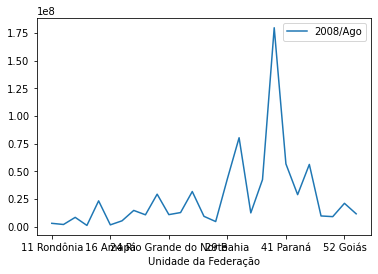

In [ ]:
dados.plot(x="Unidade da Federação", y="2008/Ago")

Esse gráfico não está muito visível, porque as legendas não estão muito boas e, principalmente, porque, pelo tipo de dados que estamos lendo, o gráfico de linhas é ruim para visualização. É melhor plotar o gráfico de barras.

Para plotar o gráfico de barras podemos fazer da forma que está abaixo ou podemos fazer:
dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar")

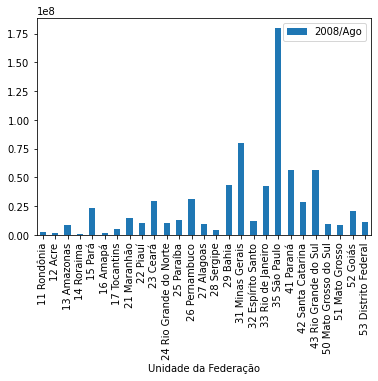

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago")

Nesse gráfico, podemos aumentar o tamanho da figura. Usamos o parâmatro Figsize para aumentar o tamanho colocando uma tupla de valores

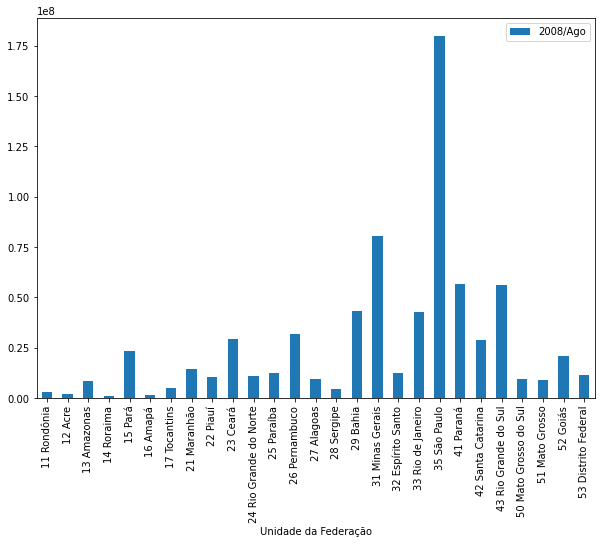

In [ ]:
dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))

Para arrumar esse problema, precisamos primeiramente usar a biblioteca matplotlib.pyplot usando a função import e importar a biblioteca matplotlib.ticker.FormatStrFormatter

#### Desafio 01: escolher um título mais descritivo, que passe a mensagem adequada.
obs: pensar no que você vai falar no gráfico. Porque se pensar "Valor por unidade da federação" não é um título que passa nenhuma mensagem, não agrega em nada. Na verdade era só ter lido os eixos que você já chegaria na conclusão do título

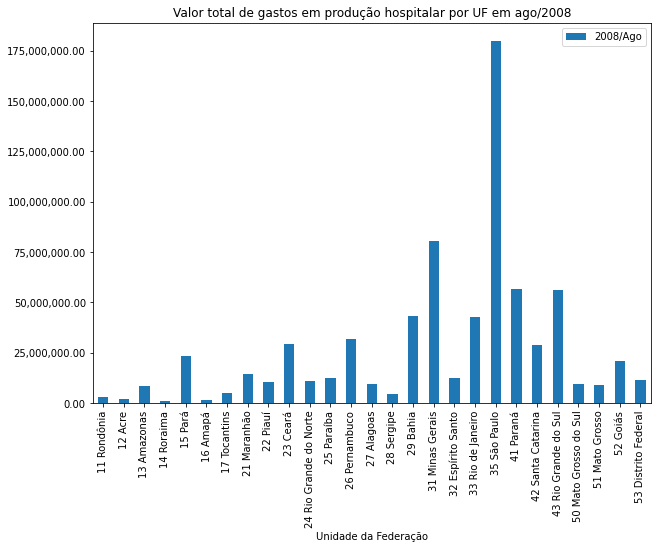

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot.bar(x="Unidade da Federação", y="2008/Ago", figsize=(10, 7))
#esse AX também é a mesma coisa que AXIS, que são os controles dos eixos X e eixos Y de um gráfico

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#buscar na documentação essa função e colocar o "," para separação de milhares e "." para separação de decimais com duas casas

plt.title("Valor total de gastos em produção hospitalar por UF em ago/2008")
#função para colocar o título em um gráfico

plt.show()
#método para excluir algumas informações de detalhes que apareceria antes do gráfico

No caso do título, precisaríamos informar quais são os valores que estão sendo exibiso (valor total de gastos em produção hospitalar) separado por UF da série histórica de agosto de 2008

#### Desafio 02: Faça a mesma análise para o mês mais recente

In [ ]:
ax = dados.sort_values(by="2021/Mar", ascending = False).plot.bar(x="Unidade da Federação", y="2021/Mar", figsize=(10, 7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor total de gastos em produção hospitalar por UF em mar/2021")
plt.show()

KeyError: ignored

### Módulo 01 Entendendo gráficos

In [ ]:
#dados["2008/Ago", "2008/Set"]
# se você tentar rodar esse código não vai funcionar, porque funciona como um dicionário, 
# ele procura uma coluna que possui esse valor "2008/Ago", "2008/Set" e como não existe dá um KeyError
# como nós queremos duas colunas precisamos criar uma lista com dois elementos

In [ ]:
dados[["2008/Ago", "2008/Set"]].head()

Agora nós queremos comparar dois meses por estado ou algo do gênero. Mas, para isso, precisamos pegar um mês que todos os estados possuem valores. A forma abaixo é uma de fazer isso.

obs: uma outra forma de tratar esses valores vazios é dropar esses valores, preencher eles com algum outro valor etc

In [ ]:
dados.mean()
# traz somente a média de um mês que tem todos os estados com um valor, por isso, não mostra valores de 1992

No caso das informações acima, estamos interessados apenas nos valores da esquerda (também chamados de Index) para fazermos nossa análise. Dessa forma, podemos selecionar os valores dos index da seguinte forma)

In [ ]:
#colunas_usaveis = dados.mean().index
# feito essa seleção das colunas nós ainda queremos inserir uma coluna no início dos dados que mostra as unidades da federação. Para isso podemos fazer o seguinte:

#colunas_usaveis.insert(0, "Unidade da Federação")
# se tentarmos inserir dessa forma não irá funcionar, porque o resultado do .index é uma série não mutável (não é uma lista). Para funcionar, precisamos transformar em uma lista

colunas_usaveis = dados.mean().index.to_list()
colunas_usaveis.insert(0, "Unidade da Federação")

Agora vamos fazer um slice na nossa tabela só dos meses que temos todos os dados de estados com valores preenchidos

In [ ]:
usaveis = dados[colunas_usaveis]
usaveis.head()

Aqui percebemos que o nosso index está como 0, 1, 2, 3 ... mas na verdade isso não é útil nem prático, porque o nosso index é a Unidade da Federação. Para isso, podemos setar como index esses valores

In [ ]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

In [ ]:
usaveis["2009/Ago"].head()
# traz a coluna de 2009 ago

In [ ]:
usaveis.loc["12 Acre"]
# essa função Loc localiza a linha cujo indice é 12 Acre

In [ ]:
#usaveis.head()
# se observamos a nossa tabela nós podemos ver que as linhas são os estados e as colunas são as datas, nós podemos transpor essa tabela usando a função .T e plotar um gráfico

usaveis.T.plot(figsize=(10, 6))

Esse gráfico está inelegível porque existe uma coluna no final do gráfico que é muito maior do que qualquer outra coluna. Usando a função .tail no nosso df podemos descobrir qual é esse valor

In [ ]:
usaveis.T.tail()

Esse valor que está lá é o valor do total. Para podermos criar um gráfico mais adequado precisamos remover esse total

In [ ]:
usaveis = usaveis.drop("Total", axis=1)
# axis 0 é o eixo da Coluna e axis 1 é o eixo da linha, como Total está na linha colocamos 1

usaveis.head()

In [ ]:
usaveis.T.plot(figsize=(10, 6))

### Desafio 01: Reposicionar a legenda. Dentro? Fora? Onde?

Nesse gráfico, além do tamanho ruim e que a legenda está no meio dos valores, eu acho difícil de descobrir o segundo maior valor (é do Tocantins?, é do Distrito Federal?)

Para melhorar a visualização do gráfico, além de ajustar o tamanho da figura e melhorar o posicionamento da legenda, eu pensei em ajustar a ordem das legendas para ser do maior para menor (tomando como base os últimos valores - Mar de 2021)

In [ ]:
usaveis["2021/Mar"].sort_values(ascending=False)

In [ ]:
legenda_maior_menor = usaveis["2021/Mar"].sort_values(ascending=False).index.to_list()
# para isso, eu selecionei a última coluna, ordenei do maior para o menor, peguei somente os índices, transformei em uma lista e chamei de legenda_maior_menor

In [ ]:
ax2 = usaveis.T.plot(figsize=(12, 8))
#tive que aumentar o tamanho da figura para ficar do tamanho da legenda de mais fácil visualização
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#função que já aprendemos previamente no Notebook e já utilizamos
plt.legend(legenda_maior_menor, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#vi essa forma de ajustar o gráfico na documentação em Legend Guide do Matplotlib no link https://matplotlib.org/1.3.1/users/legend_guide.html e coloque o label como a lista que acabei de criar que ordena a legenda

### Desafio 02: Selecionar cinco estados para plotar apenas cinco estados

In [ ]:
ax3 = usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T.plot(figsize=(12, 8))
ax3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

Quando for criar expressões muito grandes é importante prestar atenção na ordem, porque se colocar na ordem errada vai dar problema (ex: se eu colocasse o ".T" antes do loc, ele ia procurar uma linha que possui "13 Amazonas" mas na verdade o "13 amazonas" já estava na coluna.

Outra questão que altera a ordem são os tipos dos dados também (olhar tabela abaixo) o plot é um método a ser aplicado para um dataframe, se você tentar aplicar para um index não vai dar certo

Caso no gráfico acima quiséssemos aplicar o método .sort_values() poderíamos seguir a ordem df.sort_values().plot() -> precisamos seguir essa ordem porque o .sort_values() é um método para ser aplicado em um DataFrame e retorna um outro Data Frame. O plot deve ser aplicado em um Data Frame mas retorna um gráfico. Dessa forma, não é possível aplicar o .sort_values() em um gráfico, por isso seguimos essa ordem anterior

In [ ]:
#type(usaveis)
# retorna: pandas.core.frame.DataFrame -> é um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]])
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.loc[["13 Amazonas", "28 Sergipe", "51 Mato Grosso", "50 Mato Grosso do Sul", "52 Goiás"]].T)
# retorna: pandas.core.frame.DataFrame -> continua sendo um um dataframe

#type(usaveis.index)
# retorna: pandas.core.indexes.base.Index -> é uma series

#type(usaveis.plot)
# retorna: pandas.plotting._core.PlotAccessor

## Aula 03.Manipulação de dados

In [ ]:
usaveis.T.plot(figsize=(10, 6))

Gerando novamente esse gráfico, podemos perceber que a legibilidade desse gráfico é muito ruim, não tem como analisar algumas informações
ex: a cor do Ceará e a cor de São Paulo são as mesmas.

### Desafio 01: Escolher uma pelete de cores com o Matplotlib 
(provavelmente precise de 27 cores)

In [ ]:
sns.set_palette(sns.color_palette("gist_rainbow", 27))

usaveis.T.plot(figsize=(10, 6))

### Modulo 01 Aleatoriedade e mais explorações

Outro problema do código é que não dá para entender nada das linhas mais próximas ao eixo X, porque estão todas umas coladas nas outras. Provavelmente, plotar 27 linhas não é a forma mais adequada de transmitir a informação que queremos passar.

Ao invés de plotar 27 estados, nós podemos escolher cinco estados. Podemos escolher cinco aleatórios, podemos escolher os cinco que mais gastaram e várias outras formas. Vamos selecionar os cinco primeiros dados (coincidentemente são os 5 estados da região Norte)

In [ ]:
usaveis.T.columns[:5]
# retorna uma Array do Numpy que tem diversas opções de slices, como o slice que fizemos acima selecionando os 5 primeiros estados

Podemos fazer o slice na planilha que contem as linhas e plotar o gráfico

In [ ]:
usaveis[:5].T.plot(figsize=(10, 6))

Podemos também escolher 7 estados aleatórios

In [ ]:
usaveis.sample(n=7)

sample() é um método para ALEATORIEDADE. Você seleciona quantos números você quer com o parâmetro n e o método gera uma amostra aleatória. Ele gera números aleatórios a partir de cada seed que você coloca. Como toda vez que você gera um sample ele usa um seed diferente o resultado sempre é diferente.

Caso você queira gerar um valor aleatório previsível, você precisa setar o seed, que é a semente da aleatoriedade

In [ ]:
#import numpy as np

np.random.seed(687942)

usaveis.sample(n=7)
#sempre que você rodar esse código ele sempre vai gerar um resultado igual

### Desafio 02: Adicionar uma coluna mostrando a região de cada estado

In [ ]:
index_list = usaveis.index.to_list()

regiao = []
for estado in index_list:
  if estado[0] == "1":
    regiao.append("Norte")
  elif estado[0] == "2":
    regiao.append("Nordeste")
  elif estado[0] == "3":
    regiao.append("Sudeste")
  elif estado[0] == "4":
    regiao.append("Sul")
  elif estado[0] == "5":
    regiao.append("Centro-Oeste")

Criei uma lista com o index do Data Frame. Se observamos o index, podemos ver que os estados da região Norte sempre começam com o número 1 e os estados da região Nordeste com o número 2 e por aí vai.

Dessa forma eu iterei sobre essa lista e criei uma nova que dependendo do primeiro elemento ele cria a string da região adequada

In [ ]:
usaveis["Regiao"] = regiao
usaveis.head()

Depois de criar a lista basta criar a nova coluna dessa forma

### Dica para como adicionar uma coluna ao DataFrame:

In [ ]:
# usaveis.sum(axis=1)
# isso é uma série que foi criada que calcula a soma de todos os valores de cada uma das linhas

Agora para adicionar uma nova coluna no nosso DataFrame nós podemos fazer isso ou por meio de uma série ou por meio de uma lista. Uma forma de criarmos uma nova coluna é assim:

In [ ]:
usaveis["Total"] = usaveis.sum(axis=1)
usaveis.head()

#se a série tivesse menos que 27 valores (quantidade de linhas do Data Fram) não iria funcionar

### Modulo 02 Ordenação e Série Temporal

Agora nós queremos selecionar os cinco estados que mais gastam. Para isso, vamos usar a coluna total que criamos agora. Nós precisamos ordenar agora uma lista de elementos, para isso, usamos o método sort (ordenar em ingles)

In [ ]:
ordenado_por_total = usaveis.sort_values(by="Total", ascending=False)
#sort values é ordenar por um valor de coluna e sort index é ordenar por um valor de linha

ordenado_por_total = ordenado_por_total.drop(["Total", "Regiao"], axis=1)
#removendo a coluna do total falando que é uma coluna pelo parâmetro axis=1

ordenado_por_total.head()

In [ ]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

### Desafio 03: Deixar o gráfico mais bonito, a mensagem mais clara (título, legenda, escala)

In [ ]:
ax = ordenado_por_total[:5].T.plot(figsize=(12, 8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("5 maiores gastos em produção hospitalar por UF")

plt.show()

#as cores estão condizentes, é um gradiente do maior (cor mais intensa) para o menor (cor mais suave)

### Desafio 04: Adicione o seu estado aos 5 estados existentes e plote

In [ ]:
estados_e_mt = ordenado_por_total[:5].index.to_list()
estados_e_mt.append("51 Mato Grosso")

estados_e_mt

Criei uma nova lista usando como base o DF ordenado_por_total selecionando os cinco primeiros elementos e depois usei o método append de listas para adicionar o Mato Grosso

In [ ]:
ax = ordenado_por_total.loc[estados_e_mt].T.plot(figsize=(12, 8))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("5 maiores gastos em produção hospitalar por UF")

plt.show()

#as cores estão condizentes, é um gradiente do maior (cor mais intensa) para o menor (cor mais suave)

Para exibir os dados que foram selecionados na lista estados_e_mt, eu usei o método Loc

### Continuando Módulo 02 - Removendo colunas

Na base de dados do curso existia um valor muito discrepante que atrapalhava a análise inteira dos dados.
Foi necessário analisar a base olhando os valores para encontrar um valor que seria muito maior do que os outros (ex: valor de 76 milhões com um valor de 1 bilhão que depois volta para 172 milhões)

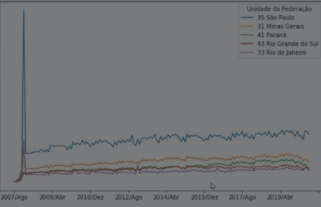

Depois que selecionamos o mês com o valor discrepante precisamos pesquisar para ver se aquele dado faz sentido (se naquele mês teve uma alta de gastos de 10x comparado com os meses anteriores e posteriores). Porém, no caso do exemplo, provavelmente, a base de dados se inicia em 2008 e os dados anteriores foram acumulados para janeiro de 2008.

No caso do exercício, nós poderíamos tratar esse dado discrepante de várias formas: fazer uma interpolação entre os valores do mês anterior e do mês posterior ou podemos apenas cortar o valor da nossa base de dados

No exercício do curso, os dados se iniciavam em 2007 e os instrutores optaram por selecionar da 6ªcoluna da base de dados para a frente. 

Para simular as operações realizadas vou fazer o mesmo trabalho eliminando a coluna de 2008/Jan (dado que os dados na data que importei não tinham esse problema, visto que, provavelmente, o fornecedor dos dados ajustou esse problema detectado)

In [ ]:
colunas_interessadas = ordenado_por_total.columns[1:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [ ]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Observando nesse gráfico podemos verificar uma certa sazonalidade, onde sempre cresce, desce e depois cresce, desce. Isso é uma certa sazonalidade

Além de sazonalidade nós temos uma tendência, que é uma tendência crescente.

Outra análise é que em 2020 teve um crescimento nos gastos hospitalares, muito provavelmente relacionado à crise de Covid-19 que teve seu pico no segundo trimestre de 2020

### Desafio 05: Plotar só os estados do sudeste e ver se afetou com um pico em 2020 de forma similar esses estados

In [ ]:
#estou usando a tabela usaveis porque já tem uma coluna das regiões
sudeste = usaveis[usaveis["Regiao"] == "Sudeste"]
sudeste.drop(["Regiao", "Total"], axis = 1).T.plot(figsize=(10, 6))

Eu criei um novo DataFrame que selecionou do DF usaveis apenas as linhas em que a coluna Região é igual a Sudeste e salvei esse novo DF como sudeste

Depois, para poder plotar esse DF sudeste, eu precisaria me livrar das colunas não numéricas e também da coluna de Total para não poluir o gráfico, para isso usei o método drop e plotei o gráfico normal

### Desafio 06: Adicionar seu estado escolhido novamente e deixe o gráfico informativo com suas informações claras

In [ ]:
sudeste_mais_mt = sudeste.index.to_list()
sudeste_mais_mt.append("51 Mato Grosso")

Criei uma nova lista usando como base o DF sudeste que já tinha filtrado apenas os estados do sudeste e adicionei o Mato Grosso

In [ ]:
ax = usaveis.loc[sudeste_mais_mt].drop(["Regiao", "Total"], axis = 1).sort_values(by="2021/Mar", ascending=False).T.plot(figsize=(10, 6))

Para plotar os dados da lista sudeste_mais_mt no DF usaveis (precisaria ser esse DF pq o DF sudeste não tem o mato grosso) eu usei o método Loc. Porém, similar ao problema anterior, tive que dropar a coluna Região e Total

Para facilitar a leitura da legenda como temos três linhas muito claras em que uma é maior que a outra, poderíamos ordenar a legenda do maior para o menor tomando como base o valor de 2021/Mar. Para isso, eu usei o método sort values

## Aula 04.Análise de gráficos e criação de hipóteses

### Modulo 01 Fugindo de más práticas

In [ ]:
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Observando o gráfico queremos pegar os dados e deixar os dados da direita em milhões, porque hoje está em dezenas de milhões. Para isso, podemos fazer o seguinte:

In [ ]:
ordenado_por_total = (ordenado_por_total/1000000)
ordenado_por_total[:5].T.plot(figsize=(10, 6))

Agora nós queremos selecionar os dados apenas dos três primeiros estados em Jan 2012 até 2019. Nós podemos fazer um slice das colunas indicando esse período desejado

In [ ]:
ordenado_por_total[ordenado_por_total.columns[46:140]][:3].T.plot(figsize=(10, 6))

Esse gráfico, parece que os gastos de São Paulo são muito maiores do que os gastos do Paraná. Porém, eles não são tão maiores. Essa ilusão ocorre porque o eixo não se inicia no valor 0. Observe o gráfico de cima comparado com o gráfico de baixo, que é exatamente o mesmo porém sem essa distorção. O valor de Paraná não parece mais tão menor do que o valor de São Paulo.

No primeiro gráfico parece que SP é 4x maior que PR, porque mostra quatro "ticks" do eixo, porém, olhando no gráfico de baixo, vemos que SP é apenas 2x (aproximadamente) maior que o PR.

In [ ]:
ordenado_por_total[ordenado_por_total.columns[46:140]][:3].T.plot(figsize=(10, 6))
plt.ylim(0, 350)
# essa função do plt determina o limite para o eixo Y, que deve começar no valor 0 e terminar no valor 350

Outro ponto de atenção é observar o eixo X, onde, em 12 meses, pode apresentar uma tendência de queda, mas, quando analisado os últimos 36 meses, obervamos uma tendência de alta (com uma pequena queda nos últimos 12 meses). Essa outra distorção ocorre também quando mudamos o tamanho da figura, como trocar de tamanho (10,6) para um tamanho quadrado (6,6)

## Aula 05.Manipulação e interpretação de gráficos

### Modulo 01 Alternativas de visualização

Queremos selecionar agora os dados do último mês.



In [ ]:
mes_mais_recente = ordenado_por_total.columns[-1]

In [ ]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente

### Existe um ditado: se um gráfico tem nome de comida, ele não deve ser utilizado.
-  O primeiro problema é que a legenda está inelegível
-  número de fatias muito grande
-  Não tem como saber se Rio Grande do SUl é maior que Paraná porque não existe uma legenda dos dados
-  Não dá para saber a ordem dos dados
-  Tem cores repetidas
-  Não dá para saber a proporção
-  É péssima para comparar grandezas (SP gastou 2 ou 3x mais que Paraná) - precisariamos compara áreas e perímetros

In [ ]:
gastos_do_mais_recente.plot.pie()

In [ ]:
#visualização mais simples para valores absolutos -> TABELA

gastos_do_mais_recente

Caso queiramos saber quantas vezes cada estado gastou quando comparado com Rio de Janeiro, poderíamos fazer a sintaxe

In [ ]:
gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

#dividindo um valor do estado pelo valor do Rio de Janeiro - ou seja, a linha do RJ vai dar 1.0

### Desafio 01 Criar a tabela de comparação com o seu estado

### Modulo 01 Alternativas de visualização

Conforme vimos anteriormente, a tabela criada é muito melhor que o gráfico de pizza para observar os valores. Porém, caso queiramos criar uma visualização gráfica para essa informação, podemos fazer um plot de barras

In [ ]:
gastos_do_mais_recente.plot.bar()

Esse gráfico não está ordenado porque na tabela nós ordenamos do maior para o menor o valor total, não o último mês. Dessa forma, podemos usar o sort_values()

In [ ]:
gastos_do_mais_recente.sort_values(ascending=False).plot.bar()

### Desafio 02 Plotar o gráfico de barra do gasto dos outros estados em comparação com o seu estado

### Desafio 03 Fazer o gasto por população do estado, escolher dois estados e plotar gráfico de barras

### Desafio 04 Explore e levante hipóteses com base nesses gráficos

### Super desafio: Escolha outro valor fora Valor Aprovado no TABNET e explore

# Módulo 2 - Visualização de dados com Seaborn e Matplotlib